In [19]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
data_path = "./Bike-Sharing-Dataset/hour.csv"
rides = pd.read_csv(data_path)

In [21]:
rides

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [22]:
categorical_cols = ["season", "mnth", "hr", "weekday", "weathersit"]

def one_hot_encode(col, data=rides):
    uniq_vals = set(data[col])
    for val in uniq_vals:
        data[col+"_"+str(val)] = (data[col] == val).astype("int")
    return data

for col in categorical_cols:
    rides = one_hot_encode(col)

In [23]:
rides

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,...,1,0,0,0,0,0,0,1,0,0
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,...,1,0,0,0,0,0,0,1,0,0
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,...,1,0,0,0,0,0,1,0,0,0
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,...,1,0,0,0,0,0,1,0,0,0


In [24]:
cols_to_drop = categorical_cols + ["instant", "dteday", "atemp", "workingday"]
data = rides.drop(cols_to_drop, axis=1)

In [25]:
data

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,0.24,0.81,0.0000,3,13,16,1,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0.22,0.80,0.0000,8,32,40,1,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0.22,0.80,0.0000,5,27,32,1,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0.24,0.75,0.0000,3,10,13,1,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0.24,0.75,0.0000,0,1,1,1,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,0.26,0.60,0.1642,11,108,119,1,0,...,1,0,0,0,0,0,0,1,0,0
17375,1,0,0.26,0.60,0.1642,8,81,89,1,0,...,1,0,0,0,0,0,0,1,0,0
17376,1,0,0.26,0.60,0.1642,7,83,90,1,0,...,1,0,0,0,0,0,1,0,0,0
17377,1,0,0.26,0.56,0.1343,13,48,61,1,0,...,1,0,0,0,0,0,1,0,0,0


In [26]:
def feature_scale(col, data=data):
    mu, sigma = data[col].mean(), data[col].std()
    scaled_features[col] = [mu, sigma]
    data.loc[:, col] = (data[col] - mu)/sigma
    return data

scaled_features = {}
features_to_scale = ["temp", "hum", "windspeed", "casual", "registered", "cnt"]

for col in features_to_scale:
    data = feature_scale(col)

In [27]:
data

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,-1.334609,0.947345,-1.553844,-0.662736,-0.930162,-0.956312,1,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,-1.438475,0.895513,-1.553844,-0.561326,-0.804632,-0.823998,1,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,-1.438475,0.895513,-1.553844,-0.622172,-0.837666,-0.868103,1,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,-1.334609,0.636351,-1.553844,-0.662736,-0.949983,-0.972851,1,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,-1.334609,0.636351,-1.553844,-0.723582,-1.009445,-1.039008,1,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,-1.230743,-0.141133,-0.211685,-0.500481,-0.302509,-0.388467,1,0,...,1,0,0,0,0,0,0,1,0,0
17375,1,0,-1.230743,-0.141133,-0.211685,-0.561326,-0.480894,-0.553859,1,0,...,1,0,0,0,0,0,0,1,0,0
17376,1,0,-1.230743,-0.141133,-0.211685,-0.581608,-0.467681,-0.548346,1,0,...,1,0,0,0,0,0,1,0,0,0
17377,1,0,-1.230743,-0.348463,-0.456086,-0.459917,-0.698922,-0.708224,1,0,...,1,0,0,0,0,0,1,0,0,0


In [28]:
test_data = data[-25*24:]
train_data = data[:-25*24]
target_cols = ["casual", "registered", "cnt"]
train_features, train_targets = train_data.drop(target_cols, axis=1), train_data[target_cols]
test_features, test_targets = test_data.drop(target_cols, axis=1), test_data[target_cols]
valid_features, valid_targets = train_features[-60*24:], train_targets[-60*24:]
train_features, train_targets = train_features[:-60*24], train_targets[:-60*24]

In [29]:
train_features

,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,mnth_1,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,-1.334609,0.947345,-1.553844,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
1,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
2,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
3,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
4,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15334,1,0,0.223378,0.740016,0.276298,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
15335,1,0,0.223378,1.051010,0.519881,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
15336,1,0,0.223378,1.051010,0.031898,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
15337,1,0,0.223378,1.310171,0.519881,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


In [30]:
from nn import NeuralNet

# network hyperparameters
iterations = 3000
hidden_units = 20
learning_rate = 0.6
output_units = 1
input_units = train_features.shape[1]

In [13]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [14]:
import sys

model = NeuralNet(input_units, hidden_units, output_units, learning_rate)
losses = {"train":[], "validation":[]}
for i in range(iterations):
    batch = np.random.choice(train_features.index, size=128)
    X, y = train_features.iloc[batch].values, train_targets.iloc[batch]["cnt"]
    model.train(X,y)
    train_loss = MSE(model.predict(train_features).T, train_targets["cnt"].values)
    val_loss = MSE(model.predict(valid_features).T, valid_targets["cnt"].values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * i/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 100.0% ... Training loss: 0.071 ... Validation loss: 0.152

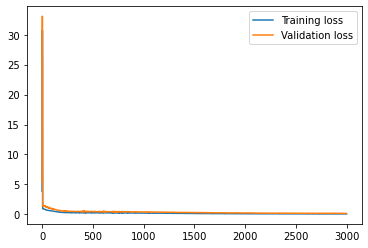

In [15]:
plt.plot(losses["train"], label="Training loss")
plt.plot(losses["validation"], label='Validation loss')
plt.legend()
_ = plt.ylim()

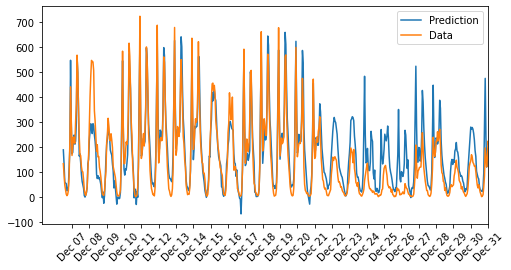

In [31]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['cnt']
predictions = model.predict(test_features).T*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)